In [163]:
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
                          
org_col_names=["No", "year","month", "day", "hour", "pm2.5", "DEWP","TEMP", "PRES", "cbwd", "Iws", "Is", "Ir"]
col_names = ['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']   
                            
dataset = pd.read_csv('AirPollution.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])                           

In [164]:
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2011-01-01 00:00:00,1,NaN,-21,-9,1033.0,NW,570.41,0,0
2011-01-01 01:00:00,2,NaN,-21,-10,1033.0,NW,573.54,0,0
2011-01-01 02:00:00,3,NaN,-21,-11,1033.0,NW,577.56,0,0
2011-01-01 03:00:00,4,NaN,-21,-10,1034.0,NW,581.58,0,0
2011-01-01 04:00:00,5,NaN,-21,-12,1034.0,NW,585.60,0,0


In [165]:
# Data cleaning
dataset.drop('No', axis=1, inplace=True)
dataset.columns = col_names
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:] # drop the first day
print(dataset.head(5))
dataset.to_csv('pollution.csv') # save new CSV

                     pollution  dew  temp  pressure w_dir  w_speed  snow  rain
year_month_day_hour                                                           
2011-01-02 00:00:00       36.0  -17    -7    1037.0    NW    75.10     0     0
2011-01-02 01:00:00       31.0  -17    -7    1037.0    NE     4.02     0     0
2011-01-02 02:00:00       20.0  -17    -7    1037.0    NE     8.94     0     0
2011-01-02 03:00:00       19.0  -18    -8    1037.0    NW     4.02     0     0
2011-01-02 04:00:00       18.0  -18    -8    1037.0    NE     4.02     0     0


In [166]:
# load dataset
df = pd.read_csv('pollution.csv', header=0, index_col=0)
df.describe()

,pollution,dew,temp,pressure,w_speed,snow,rain
count,32112.000000,32112.000000,32112.000000,32112.000000,32112.000000,32112.000000,32112.000000
mean,93.150909,2.081714,12.957306,1016.008175,22.406187,0.052504,0.176476
std,91.298620,14.573235,12.252455,10.553292,46.654449,0.725754,1.292159
min,0.000000,-40.000000,-18.000000,991.000000,0.450000,0.000000,0.000000
25%,25.000000,-10.000000,2.000000,1007.000000,1.790000,0.000000,0.000000
50%,67.000000,2.000000,15.000000,1016.000000,5.360000,0.000000,0.000000
75%,131.000000,16.000000,23.000000,1025.000000,21.460000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,490.380000,23.000000,32.000000


In [167]:
dataset_columns = df.columns.tolist()
dataset_columns

['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']

<Axes: >

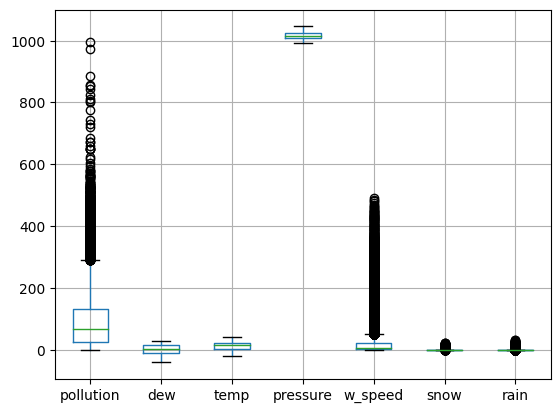

In [168]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [169]:
df

,pollution,dew,temp,pressure,w_dir,w_speed,snow,rain
year_month_day_hour,,,,,,,,
2011-01-02 00:00:00,36.0,-17,-7,1037.0,NW,75.10,0,0
2011-01-02 01:00:00,31.0,-17,-7,1037.0,NE,4.02,0,0
2011-01-02 02:00:00,20.0,-17,-7,1037.0,NE,8.94,0,0
2011-01-02 03:00:00,19.0,-18,-8,1037.0,NW,4.02,0,0
2011-01-02 04:00:00,18.0,-18,-8,1037.0,NE,4.02,0,0
...,...,...,...,...,...,...,...,...
2014-08-31 19:00:00,75.0,21,22,1013.0,NE,1.79,0,0
2014-08-31 20:00:00,93.0,21,22,1013.0,NW,0.89,0,0
2014-08-31 21:00:00,99.0,21,21,1014.0,NW,2.68,0,0


C:\Users\annam\AppData\Local\Temp\ipykernel_15804\1708648667.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


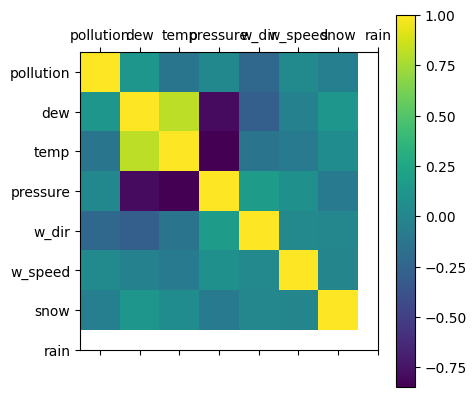

In [170]:
#Analysing relationship between different features
cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [171]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
values[:,4]

array([1., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [172]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [173]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [174]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (32108, 1)
X (32108, 4, 8)


In [175]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (23348, 4, 8)
X_test (8760, 4, 8)
Y_train (23348, 1)
Y_test (8760, 1)


In [176]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')         

c:\Users\annam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [177]:
#Train the model
import numpy as np
from keras.optimizers import Adam
print(np.isnan(X_train).any())
print(np.isinf(X_train).any())
print(np.isnan(Y_train).any())
print(np.isinf(Y_train).any())
model.fit(X_train, Y_train, epochs = 20, batch_size = 16)


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error',run_eagerly=True)


False
False
False
False
Epoch 1/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0035
Epoch 2/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0012
Epoch 3/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0010
Epoch 4/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.8953e-04
Epoch 5/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.9135e-04
Epoch 6/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.5845e-04
Epoch 7/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.7546e-04
Epoch 8/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 8.1580e-04
Epoch 9/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 7.8690e-04
Epoch 10/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 8.4383e-04
Epoch 11/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 8.2486e-04
Epoch 12/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 8.1845e-04
Epoch 13/20
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 8.3260e-04
Epoch 14/20
1460

In [178]:
#Taking predictions
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

In [179]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step


0.026051002

In [180]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 8)
scaled Values shape (32112, 8)


In [181]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 8)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [182]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [183]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

25.894695

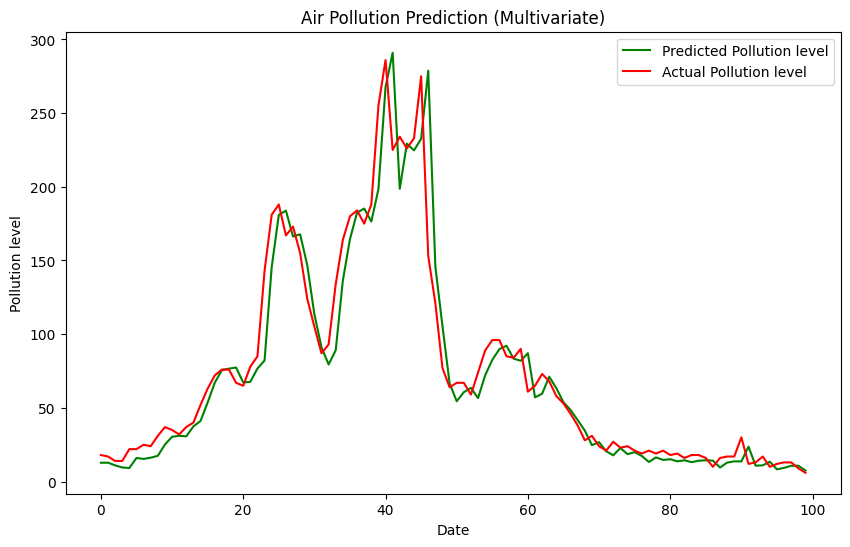

<Figure size 640x480 with 0 Axes>

In [184]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')
plt.savefig('outputImage.png')

In [185]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)


MAPE inf


C:\Users\annam\AppData\Local\Temp\ipykernel_15804\249640264.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [186]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 25.894695
Mean of Test data  91.08539


In [187]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar

# Define a function to parse dates
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

# Generate random data for the new dataset
num_samples = 8760  # Assuming hourly data for a year
np.random.seed(42)

# Generate random values for each feature
pm25 = np.random.randint(0, 300, num_samples)
dewp = np.random.randint(-30, 30, num_samples)
temp = np.random.randint(-10, 40, num_samples)
pres = np.random.randint(990, 1030, num_samples)
cbwd = np.random.choice(['NW', 'NE', 'SW', 'SE'], num_samples)
iws = np.random.uniform(0, 50, num_samples)
is_ = np.random.randint(0, 10, num_samples)
ir = np.random.randint(0, 10, num_samples)

# Generate random dates ensuring valid day values for each month
year_range = np.random.randint(2010, 2023, num_samples)
month_range = np.random.randint(1, 13, num_samples)
days_in_month = [calendar.monthrange(year, month)[1] for year, month in zip(year_range, month_range)]
day_range = [np.random.randint(1, days + 1) for days in days_in_month]

# Create a DataFrame for the new dataset
new_data = pd.DataFrame({
    'year': year_range,
    'month': month_range,
    'day': day_range,
    'hour': np.random.randint(0, 24, num_samples),
    'pm2.5': pm25,
    'DEWP': dewp,
    'TEMP': temp,
    'PRES': pres,
    'cbwd': cbwd,
    'Iws': iws,
    'Is': is_,
    'Ir': ir
})

# Sort the DataFrame by date
new_data['date'] = pd.to_datetime(new_data[['year', 'month', 'day', 'hour']])
new_data = new_data.sort_values(by='date').drop('date', axis=1)

# Save the new dataset to a CSV file
new_data.to_csv('new_air_pollution_data_sorted.csv', index=False)
